In [3]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.0 MB 6.3 MB/s eta 0:00:04
   -------------- ------------------------- 8.9/24.0 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 44.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 15.8/15.8 MB 90.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---- ----------------------------------- 5.5/46.2 MB 25.8 MB/s eta 0:00:02
   ------------ --------------------------- 14.4/46.2 MB 34.9 MB/s eta 0:00:01
   ---------------- ----------------------- 18.6/46.2 MB 31.7 MB/s eta 0:00:01
   ------------------------- -------------- 29.1/46.2 MB 35.5 MB/s eta 0:00:01
   ---------------------------------- ----- 40.4/46.2 MB 38.9 MB/s eta 0:00:01
   ---------------------------------------- 46.2/46.2 MB 37.7 MB/s eta 0:00:00
  At

In [ ]:
##小試身手


相似詞測試:

與 'learning' 相似的詞:
changing: 0.1914
intelligence: 0.1673
popular: 0.1635
of: 0.1387
language: 0.1330
live: 0.1298
biological: 0.1165
technology: 0.1072
and: 0.1002
programming: 0.0995

與 'data' 相似的詞:
require: 0.1894
fox: 0.1885
advances: 0.1836
dog: 0.1606
understand: 0.1593
python: 0.1371
natural: 0.1276
lazy: 0.1232
brain: 0.1177
big: 0.0948

與 'python' 相似的詞:
of: 0.2534
changing: 0.1685
amounts: 0.1499
natural: 0.1470
understand: 0.1427
data: 0.1371
way: 0.1237
human: 0.1168
future: 0.1148
structures: 0.0992


C:\Users\richa\anaconda3\envs\yuanlab\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


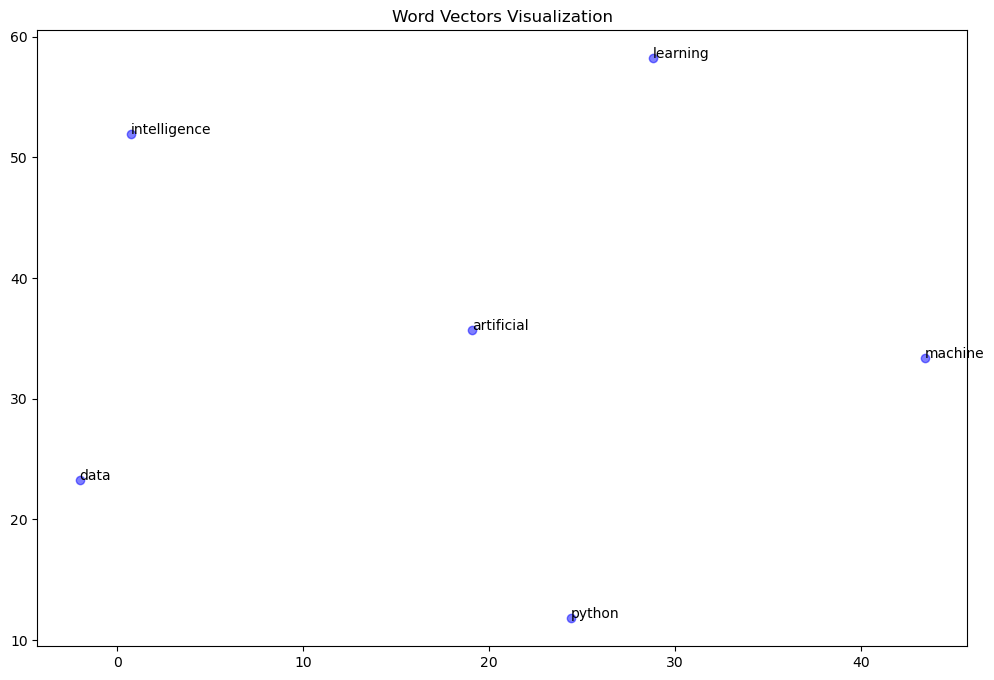


詞向量運算示例:
'artificial' 和 'intelligence' 的相似度: -0.0736
'machine' 和 'learning' 的相似度: -0.1438
'data' 和 'science' 的相似度: -0.1609

模型信息:
詞彙量: 63
向量維度: 100
窗口大小: 5
訓練算法: Skip-gram


In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
import re
import multiprocessing
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 文本預處理函數
def preprocess_text(text):
    """
    預處理文本：小寫化、移除特殊字符等
    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip().split()

# 示例文本數據
texts = [
    "The quick brown fox jumps over the lazy dog",
    "Machine learning is a subset of artificial intelligence",
    "Deep learning models require large amounts of data",
    "Natural language processing helps computers understand human language",
    "Python is a popular programming language for data science",
    "Artificial intelligence is changing the way we live and work",
    "The future of technology depends on machine learning advances",
    "Data scientists use Python for analyzing large datasets",
    "Neural networks are inspired by biological brain structures",
    "Big data analytics helps companies make better decisions"
]

# 預處理文本
processed_texts = [preprocess_text(text) for text in texts]

# 訓練 Word2Vec 模型
model = Word2Vec(sentences=processed_texts,
                vector_size=100,
                window=5,
                min_count=1,
                workers=multiprocessing.cpu_count(),
                sg=1)

def visualize_words(model, words, figsize=(12, 8)):
    """
    使用 t-SNE 視覺化詞向量
    """
    # 獲取詞向量
    word_vectors = []
    valid_words = []
    
    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])
            valid_words.append(word)
    
    if not word_vectors:
        print("No valid words to visualize")
        return
    
    # 將列表轉換為 NumPy 數組
    word_vectors = np.array(word_vectors)
    
    # 計算適當的 perplexity 值（應小於樣本數）
    n_samples = len(word_vectors)
    perplexity = min(30, n_samples - 1)  # 確保 perplexity 小於樣本數
    
    # 使用 t-SNE 降維，調整 perplexity
    tsne = TSNE(n_components=2, 
                random_state=42, 
                perplexity=perplexity,
                n_iter=1000)
    vectors_2d = tsne.fit_transform(word_vectors)
    
    # 繪製圖形
    plt.figure(figsize=figsize)
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='b', alpha=0.5)
    
    # 添加詞標籤
    for i, word in enumerate(valid_words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))
    
    plt.title("Word Vectors Visualization")
    plt.show()

# 測試模型
print("\n相似詞測試:")
test_words = ['learning', 'data', 'python']
for word in test_words:
    print(f"\n與 '{word}' 相似的詞:")
    try:
        similar = model.wv.most_similar(word)
        for w, score in similar:
            print(f"{w}: {score:.4f}")
    except KeyError:
        print(f"詞 '{word}' 不在詞彙表中")

# 視覺化一些相關詞
words_to_viz = ['python', 'data', 'learning', 'artificial', 'intelligence', 'machine']
visualize_words(model, words_to_viz)

# 獲取詞向量
def get_word_vector(model, word):
    """
    獲取詞的向量表示
    """
    try:
        return model.wv[word]
    except KeyError:
        return None

# 計算詞之間的餘弦相似度
def cosine_similarity(model, word1, word2):
    """
    計算兩個詞之間的餘弦相似度
    """
    try:
        return model.wv.similarity(word1, word2)
    except KeyError:
        return None

# 詞向量運算示例
print("\n詞向量運算示例:")
word_pairs = [
    ('artificial', 'intelligence'),
    ('machine', 'learning'),
    ('data', 'science')
]

for word1, word2 in word_pairs:
    similarity = cosine_similarity(model, word1, word2)
    if similarity is not None:
        print(f"'{word1}' 和 '{word2}' 的相似度: {similarity:.4f}")

# 模型參數信息
print("\n模型信息:")
print(f"詞彙量: {len(model.wv)}")
print(f"向量維度: {model.vector_size}")
print(f"窗口大小: {model.window}")
print(f"訓練算法: {'Skip-gram' if model.sg else 'CBOW'}")


詞彙量 (Vocabulary Size) = 63

這表示模型學習到的唯一詞的總數量
在這個例子中，從所有輸入文本中共識別出63個不同的詞
這個數字取決於：
輸入文本的大小
文本的多樣性
min_count參數（設定詞最少出現次數）
例如：如果一個詞在所有文本中出現的次數小於min_count，它就不會被包含在詞彙表中

向量維度 (Vector Size) = 100

這是每個詞被轉換為的向量的維度
在代碼中通過vector_size=100設定
含義：
每個詞都被表示為100維的數值向量
維度越高，可以捕捉的語義信息越豐富，但計算成本也越高
常見的設置範圍是50~300
例如：'python' 這個詞會被表示為一個包含100個數字的向量：[0.1, -0.3, 0.5, ..., 0.2]

窗口大小 (Window Size) = 5

在代碼中通過window=5設定
表示模型在學習詞的語義時，會考慮目標詞前後各5個詞
影響：
窗口越大，考慮的上下文越多，詞的語義關係越廣泛
窗口越小，focus在更近的詞之間的關係
常見設置範圍是5-10